# <center> Workshop 4: Tropical Cyclones</center>

Will include: 
- Toy models and sensitivity - changing sst; warm top vs cold top vs neutral; rh scenarios ("dry high") and ("wet high")

Method: use warming fractions to perturb t by more or less relative to sst change. 



In [44]:
import xarray as xa, numpy as np
from pyPI import pi
import matplotlib.pyplot as plt
from src import utils
%matplotlib inline

In [45]:
fin="/home/lunet/gytm3/Teaching/GYP050/Public/Data/era5_tc_ilev.nc"
sample="/home/lunet/gytm3/Teaching/GYP050/Public/Data/sample_data.nc"

In [46]:
data=xa.open_dataset(fin)
test=xa.open_dataset(sample)
data["msl"]=data["msl"]/100. #hPa

dsst=2
dt=3
drh=0.25
nt,nlev,nr,nc=data["t"].shape
t=data["t"].values
q=data["q"].values
p=data["level"].values
sst=data["sst"].values
sst_out,t_out,rh_out,q_out=utils.gen_future_conditions(dsst,dt,drh,sst,t,q,p,nt,nlev,nr,nc)

data["t"].values=t_out-273.15
data["sst"].values=sst_out-273.15
data["q"].values=q_out

In [47]:
# (VMAX,PMIN,IFL,TO,LNB)=pi(SST,MSL,P,T,R)
result = xa.apply_ufunc(
        pi,
        data['sst'], data['msl'], data['level'], data['t'], data['q'],
        kwargs=dict(CKCD=0.9, ascent_flag=0, diss_flag=1, ptop=50, miss_handle=1),
        input_core_dims=[
            [], [], ['level', ], ['level', ], ['level', ],
        ],
        output_core_dims=[
            [], [], [], [], []
        ],
        vectorize=True
    )

#(VMAX,PMIN,IFL,TO,LNB)=pi(smean["sst"].values,smean["msl"].values/100.,pmean["level"].values,
 #                         pmean["t"].values[:],pmean["q"].values)

(array([0.00041366, 0.00212739, 0.00400658, 0.008545  , 0.01006963,
        0.01272886, 0.01525809, 0.02076565, 0.0240631 , 0.03071709,
        0.03852933, 0.04283137, 0.04752344, 0.05571388, 0.0608787 ,
        0.07009737, 0.08385447, 0.09251766, 0.09918347, 0.08463451,
        0.08660825, 0.07879602, 0.05983864, 0.05005267, 0.0329863 ,
        0.01561265, 0.01207883, 0.00613396, 0.00380566, 0.00089823]),
 array([ 92.9232837 ,  93.79188934,  94.66049499,  95.52910063,
         96.39770628,  97.26631193,  98.13491757,  99.00352322,
         99.87212886, 100.74073451, 101.60934015, 102.4779458 ,
        103.34655144, 104.21515709, 105.08376274, 105.95236838,
        106.82097403, 107.68957967, 108.55818532, 109.42679096,
        110.29539661, 111.16400226, 112.0326079 , 112.90121355,
        113.76981919, 114.63842484, 115.50703048, 116.37563613,
        117.24424178, 118.11284742, 118.98145307]),
 <BarContainer object of 30 artists>)

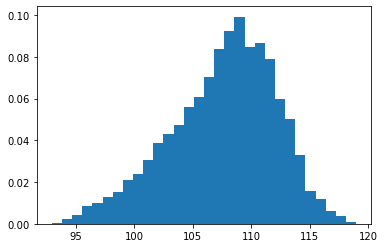

In [48]:
vmax, pmin, ifl, t0, otl = result
vmax=vmax.values.flatten()
fig,ax=plt.subplots(1,1)
ax.hist(vmax[~np.isnan(vmax)],density=True,bins=30)

In [49]:
np.percentile(vmax,99.9)

118.01870727476026